In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading inbuilt dataset of images

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

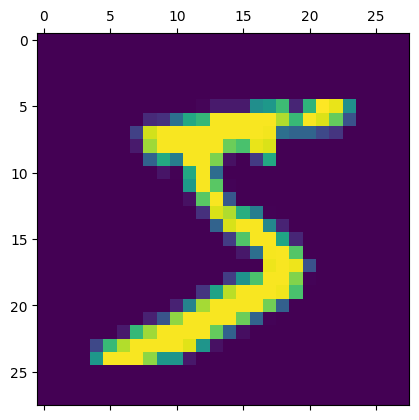

In [5]:
plt.matshow(x_train[0])

In [6]:
# scaling the data

x_train = x_train/255
x_test = x_test/255

In [7]:
# reshaping the data to 1-D matrix

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [8]:
# Loading model

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),
    activation='sigmoid')
])

d:\Data\DeepLearning\Practicals\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# model training over 5 epochs

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8132 - loss: 0.7109
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9128 - loss: 0.3137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9192 - loss: 0.2910
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9265 - loss: 0.2627


In [11]:
# model accuracy

model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9156 - loss: 0.2997


[0.26423588395118713, 0.9261999726295471]

In [12]:
# model prediction

y_pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


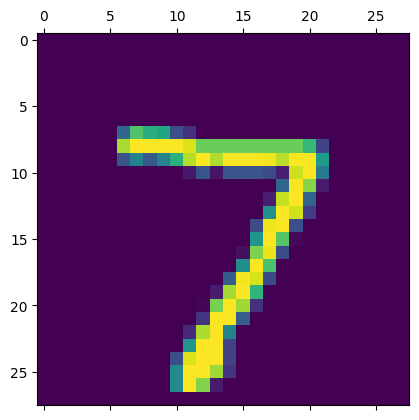

In [13]:
# checking first image in test data

plt.matshow(x_test[0])

In [14]:
# first predicted image

y_pred[0]

array([1.8129649e-02, 4.2402885e-07, 6.0990319e-02, 9.5956397e-01,
       2.1770305e-03, 1.2801482e-01, 1.4431007e-06, 9.9984485e-01,
       1.0197267e-01, 6.4854783e-01], dtype=float32)

In [15]:
# checking first value in predicted values

np.argmax(y_pred[0])

np.int64(7)

In [16]:
# converting predicted values to 1-D array

y_pred = np.array(y_pred)

In [17]:
y_predict_label = np.argmax(y_pred,axis=1)

In [18]:
# confusion matrix for predicted and actual values

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

Text(95.72222222222221, 0.5, 'Actual')

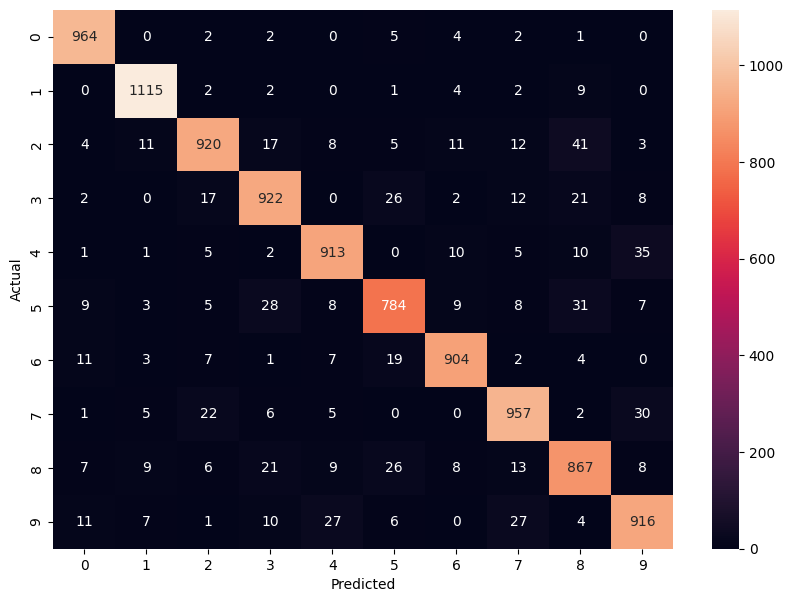

In [19]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [20]:
# Dense layer adding in Model

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

d:\Data\DeepLearning\Practicals\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['Accuracy'])

In [23]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.8735 - loss: 0.4429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Accuracy: 0.9616 - loss: 0.1270
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9746 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.9808 - loss: 0.0644
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9856 - loss: 0.0478


In [24]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - Accuracy: 0.9692 - loss: 0.0921


[0.0803753212094307, 0.9746000170707703]

In [25]:
y_pred1 = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
y_pred1[0]

array([1.3802152e-02, 1.0051175e-04, 6.2434185e-01, 8.4944069e-01,
       4.6192281e-06, 3.1940206e-03, 6.6874065e-08, 9.9985307e-01,
       4.9289837e-01, 1.5812308e-01], dtype=float32)

In [27]:
np.argmax(y_pred1[0])

np.int64(7)

In [28]:
y_pred1 = np.array(y_pred1)

In [29]:
y_pred1_label = np.argmax(y_pred1,axis=1)

In [30]:
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1_label)

Text(95.72222222222221, 0.5, 'Actual')

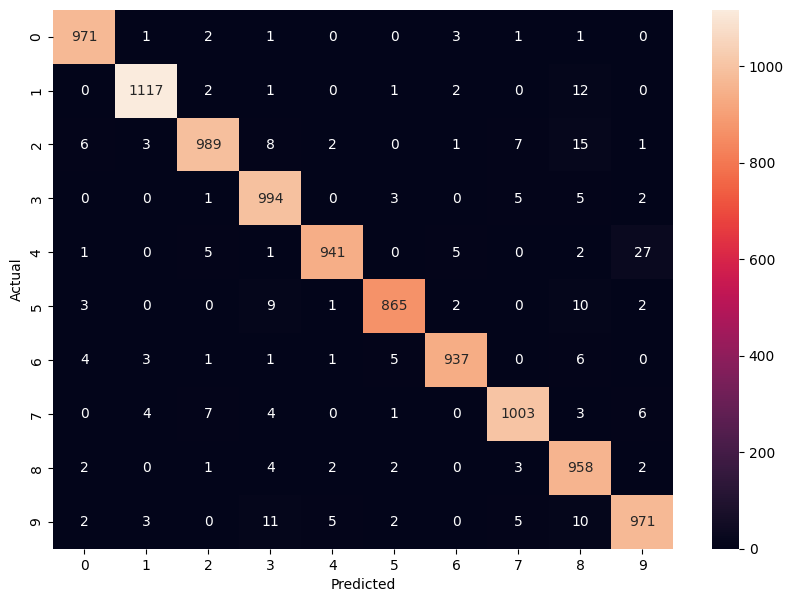

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')